In [117]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt
from sklearn.preprocessing import StandardScaler
from pprint import pprint
import yfinance as yf
%matplotlib inline



In [118]:
symbols = 'ONGC.NS BPCL.NS ADANIENT.NS MUTHOOTFIN.NS NTPC.NS'
ticker = yf.Tickers(symbols)

df = ticker.history(start = '2017-01-01',
                    end='2020-12-31',
                    interval='1d',
                    actions = False,
                    rounding = True)
df

[*********************100%***********************]  5 of 5 completed


Close                                              High                                        ...        Open                                            Volume                                           
                          ADANIENT.NS BPCL.NS MUTHOOTFIN.NS NTPC.NS ONGC.NS ADANIENT.NS BPCL.NS MUTHOOTFIN.NS NTPC.NS ONGC.NS  ... ADANIENT.NS BPCL.NS MUTHOOTFIN.NS NTPC.NS ONGC.NS ADANIENT.NS  BPCL.NS MUTHOOTFIN.NS   NTPC.NS   ONGC.NS
Date                                                                                                                           ...                                                                                                         
2017-01-02 00:00:00+05:30       41.10  285.98        253.64  101.37  145.96       41.56  287.88        255.24  102.81  146.53  ...       41.56  285.76        253.46  101.52  145.62     4214451  1690152        144601   3152186   2690448
2017-01-03 00:00:00+05:30       40.89  290.47        254.84  101.77  146.15       41.35  293.80        259.60  102.26  147.10  ...       41.18  287.54        253.46  101.43  146.83     2311286  4736077        285215   2448501   4764310
2017-01-04 00:00:00+05:30       41.56  292.66        255.15  101.40  147.89       42.09  295.09        257.37  103.03  149.37  ...       41.13  290.13        255.24  101.52  146.91     3999976  4178112        223054   3729337   7507779
2017-01-05 00:00:00+05:30       42.28  300.36        260.49  101.49  151.58       42.52  301.14        262.89  102.29  152.03  ...       41.93  292.23        257.91  100.91  148.27     4236903  3720748        285723   6652960   6831388
2017-01-06 00:00:00+05:30       42.01  296.85        262.49  100.88  153.78       42.68  304.06        265.02  102.29  157.12  ...       42.31  299.60        261.46  101.52  151.84     2129980  2476677        345224   4947444   8399536
...                               ...     ...           ...     ...     ...         ...     ...           ...     ...     ...  ...         ...     ...           ...     ...     ...         ...      ...           ...       ...       ...
2020-12-23 00:00:00+05:30      463.10  316.71       1152.69   86.40   81.92      466.29  319.07       1173.06   87.14   82.37  ...      457.50  315.52       1144.57   86.84   81.65     4604130  5982753       1481813  17602151  29216106
2020-12-24 00:00:00+05:30      473.13  319.37       1149.36   87.62   84.04      479.33  322.50       1165.03   88.98   86.16  ...      464.49  318.40       1161.01   87.06   83.46     7985151  6065886        807787  23052394  46351620
2020-12-28 00:00:00+05:30      490.32  323.77       1178.53   88.06   84.63      506.45  325.25       1183.27   89.03   85.85  ...      472.49  321.44       1160.05   88.41   84.81    13714406  4903064       1235405  15454893  17759262
2020-12-29 00:00:00+05:30      488.67  322.71       1170.45   86.44   84.04      498.61  326.18       1192.85   88.59   85.40  ...      491.46  325.25       1185.20   88.11   84.99     5849496  4017007       1339727  23647197  17678810
2020-12-30 00:00:00+05:30      483.62  323.85       1173.06   86.88   84.13      495.46  325.00       1179.25   87.36   85.26  ...      488.67  323.13       1176.49   86.79   84.36     5419517  3091717        604708  30281285  15960705

[987 rows x 25 columns]

In [119]:
price_data_frame = df['Close']
price_data_frame

,ADANIENT.NS,BPCL.NS,MUTHOOTFIN.NS,NTPC.NS,ONGC.NS
Date,,,,,
2017-01-02 00:00:00+05:30,41.10,285.98,253.64,101.37,145.96
2017-01-03 00:00:00+05:30,40.89,290.47,254.84,101.77,146.15
2017-01-04 00:00:00+05:30,41.56,292.66,255.15,101.40,147.89
2017-01-05 00:00:00+05:30,42.28,300.36,260.49,101.49,151.58
2017-01-06 00:00:00+05:30,42.01,296.85,262.49,100.88,153.78
...,...,...,...,...,...
2020-12-23 00:00:00+05:30,463.10,316.71,1152.69,86.40,81.92
2020-12-24 00:00:00+05:30,473.13,319.37,1149.36,87.62,84.04
2020-12-28 00:00:00+05:30,490.32,323.77,1178.53,88.06,84.63


In [120]:
log_returns = np.log(1+ price_data_frame.pct_change()) #calculate log returns because they are more accurate with time

symbols1 = ['ONGC.NS',
            'BPCL.NS',
            'ADANIENT.NS',
            'MUTHOOTFIN.NS',
            'NTPC.NS']
no_of_symb =5

In [121]:
no_of_portfolios = int(input("Enter no_of_Portfolios:"))

all_weights = np.zeros((no_of_portfolios,no_of_symb))

ret_arr = np.zeros(no_of_portfolios)

vol_arr = np.zeros(no_of_portfolios)

sharpe_arr = np.zeros(no_of_portfolios)

for ind in range(no_of_portfolios):
    
    weights = np.array(np.random.random(no_of_symb))
    weights  = weights/np.sum(weights)
    
    all_weights[ind, :] = weights
    
    ret_arr[ind] = np.sum(log_returns.mean()*weights*987)
    
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T,
               np.dot(log_returns.cov()*987,weights)
    )
    )
    
    sharpe_arr[ind] = (ret_arr[ind])/vol_arr[ind]
    
simulation_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

simulations_df = pd.DataFrame(data=simulation_data).T

simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio weights'
]

simulations_df = simulations_df.infer_objects()

print('')
print('#'*80)
print('Portfolio metrics:')
print('#'*80)
display(simulations_df.head())
print('#'*80)

Enter no_of_Portfolios:3000

################################################################################
Portfolio metrics:
################################################################################


,Returns,Volatility,Sharpe Ratio,Portfolio weights
0,0.708206,0.536866,1.319148,"[0.20907928860959307, 0.26513061748140054, 0.17354182940420318, 0.22026278900432172, 0.13198547550048143]"
1,0.705411,0.566905,1.244320,"[0.17279150831827048, 0.370716580020515, 0.21207954545344102, 0.10709429719979163, 0.13731806900798196]"
2,0.777291,0.531741,1.461784,"[0.1763029274822458, 0.04893534905859798, 0.3254741503327046, 0.21394050369607856, 0.23534706943037298]"
3,0.536297,0.489093,1.096514,"[0.16415118887172372, 0.07816315017007062, 0.14659685827074678, 0.5886718307746582, 0.022416971912800676]"
4,0.827617,0.518773,1.595336,"[0.23380949690116676, 0.08182822120849884, 0.22091502212010006, 0.39629359065212216, 0.06715366911811219]"


################################################################################


In [122]:
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

max_return = simulations_df.loc[simulations_df['Returns'].idxmax()]

print('')
print('-'*80)
print('Min Volatility:')
print('-'*80)
display(min_volatility)
print('-'*80)

print('')
print('-'*80)
print('Max return:')
print('-'*80)
print(max_return)
print('-'*80)
print("Shape Ratio in Case of maximum return is:")
print(max_return['Sharpe Ratio'])


--------------------------------------------------------------------------------
Min Volatility:
--------------------------------------------------------------------------------


Returns                                                                                                             0.148406
Volatility                                                                                                          0.469984
Sharpe Ratio                                                                                                        0.315769
Portfolio weights    [0.06963405525992113, 0.08697696523022476, 0.09846177447404265, 0.568192933755151, 0.17673427128066038]
Name: 2347, dtype: object

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Max return:
--------------------------------------------------------------------------------
Returns                                                                                                               1.766727
Volatility                                                                                                            0.744209
Sharpe Ratio                                                                                                          2.373967
Portfolio weights    [0.5797681930030607, 0.09182808700994582, 0.22978024649339582, 0.06720249394322726, 0.031420979550370466]
Name: 2297, dtype: object
--------------------------------------------------------------------------------
Shape Ratio in Case of maximum return is:
2.3739670657346306


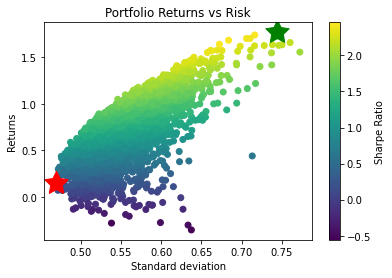

In [123]:
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    marker = 'o'
)

plt.title('Portfolio Returns vs Risk')
plt.colorbar(label ='Sharpe Ratio')
plt.xlabel('Standard deviation')
plt.ylabel('Returns')

plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker = (5,1,0),
    color = 'r',
    s=600
)

plt.scatter(
    max_return[1],
    max_return[0],
    marker = (5,1,0),
    color = 'g',
    s=600
)

plt.show()